In [3]:
# Cell 1: Imports and Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- Configuration ---
# Using the file generated by Member 1 (which includes the target variable)
INPUT_FILE = '../../data/processed/listings_cleaned_with_target.csv'
FIGURES_PATH = '../../outputs/figures/'

# Create output directory if it doesn't exist
os.makedirs(FIGURES_PATH, exist_ok=True)

# Visualization Settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print(f" EDA Setup Complete. Figures will be saved to: {FIGURES_PATH}")

 EDA Setup Complete. Figures will be saved to: ../../outputs/figures/


In [4]:
# Cell 2: Load Data
if os.path.exists(INPUT_FILE):
    df_eda = pd.read_csv(INPUT_FILE)
    print(f"✅ Data loaded successfully. Shape: {df_eda.shape}")
else:
    print(f"❌ Error: {INPUT_FILE} not found. Please ensure Member 1's code has run.")

# Display summary statistics for key columns
eda_cols = ['price', 'review_scores_rating', 'accommodates', 'bedrooms', 'fp_score', 'value_category']
print("\n--- Summary Statistics for Key Variables ---")
print(df_eda[eda_cols].describe().T)

✅ Data loaded successfully. Shape: (19912, 71)

--- Summary Statistics for Key Variables ---
                        count        mean         std        min         25%  \
price                 19912.0  198.929389  118.568008  11.000000  120.000000   
review_scores_rating  19912.0    4.817988    0.337256   1.000000    4.800000   
accommodates          19912.0    4.164223    2.812945   1.000000    2.000000   
bedrooms              19912.0    1.641874    1.121229   0.000000    1.000000   
fp_score              19912.0    0.749624    0.298591   0.080043    0.545943   

                             50%        75%      max  
price                 175.000000  237.00000  680.000  
review_scores_rating    4.900000    4.97000    5.000  
accommodates            4.000000    6.00000   16.000  
bedrooms                1.000000    2.00000   12.000  
fp_score                0.709853    0.91036    2.235  


In [9]:
# Cell 3: Define Distribution Plot Function
def plot_distribution(data, column, title, xlabel, save_name):
    """
    Creates a composite plot (Boxplot + Histogram) to visualize distribution.
    """
    fig, (ax_box, ax_hist) = plt.subplots(2, 1, sharex=True, 
                                          gridspec_kw={"height_ratios": (.15, .85)}, 
                                          figsize=(10, 6))
 
    color = 'teal'
    
    # Top Plot: Boxplot (for outlier detection)
    sns.boxplot(x=data[column], ax=ax_box, color=color, flierprops={"marker": "x"})
    ax_box.set(xlabel='') # Remove x label for top plot
    ax_box.set_title(title, fontweight='bold')
    
    # Bottom Plot: Histogram (for distribution shape)
    sns.histplot(x=data[column], ax=ax_hist, kde=True, color=color, bins=30)
    ax_hist.set_xlabel(xlabel, fontweight='bold')
    ax_hist.set_ylabel('Frequency')
    
    # Add Mean and Median lines
    mean_val = data[column].mean()
    median_val = data[column].median()
    ax_hist.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax_hist.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    ax_hist.legend()

    plt.tight_layout()
    
    # Save Figure
    save_path = os.path.join(FIGURES_PATH, save_name)
    plt.savefig(save_path, dpi=300)
    print(f"✓ Saved plot: {save_path}")
    plt.show()

✓ Saved plot: ../../outputs/figures/eda_dist_price.png


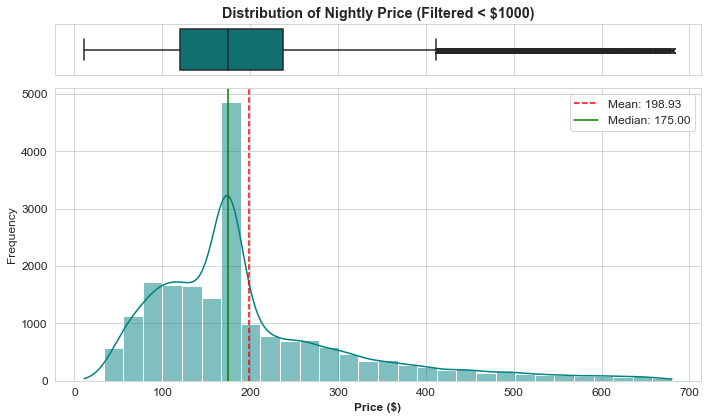

✓ Saved plot: ../../outputs/figures/eda_dist_rating.png


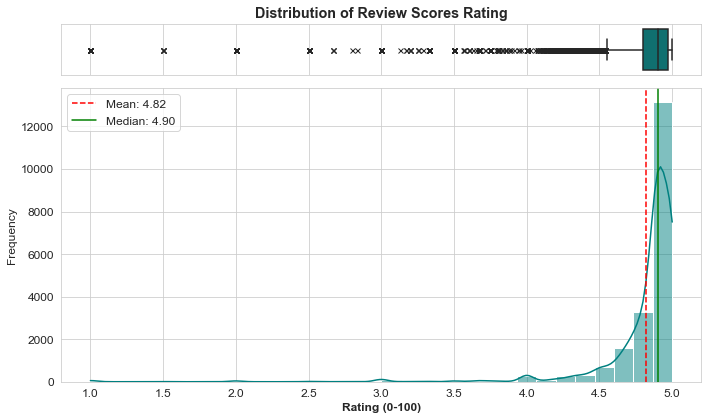

✓ Saved plot: ../../outputs/figures/eda_dist_accommodates.png


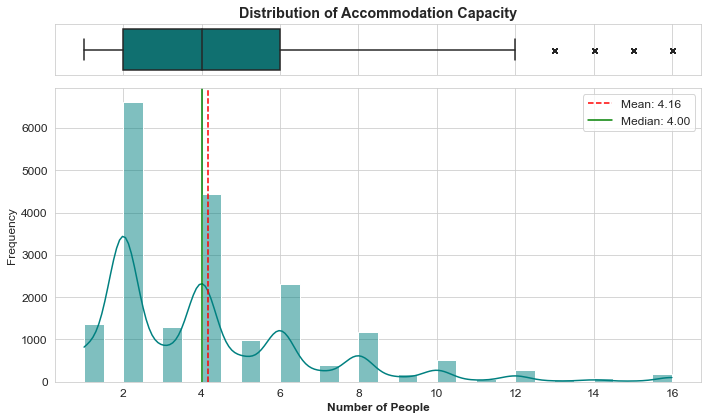

In [10]:
# Cell 4: Univariate Analysis of Key Features

# 1. Price Distribution
# Filtering extreme outliers (e.g., > $1000) just for better visualization
plot_data = df_eda[df_eda['price'] <= 1000] 

plot_distribution(
    data=plot_data,
    column='price',
    title='Distribution of Nightly Price (Filtered < $1000)',
    xlabel='Price ($)',
    save_name='eda_dist_price.png'
)

# 2. Rating Distribution
plot_distribution(
    data=df_eda,
    column='review_scores_rating',
    title='Distribution of Review Scores Rating',
    xlabel='Rating (0-100)',
    save_name='eda_dist_rating.png'
)

# 3. Accommodation Capacity
plot_distribution(
    data=df_eda,
    column='accommodates',
    title='Distribution of Accommodation Capacity',
    xlabel='Number of People',
    save_name='eda_dist_accommodates.png'
)

✓ Saved plot: ../../outputs/figures/eda_dist_fp_score.png


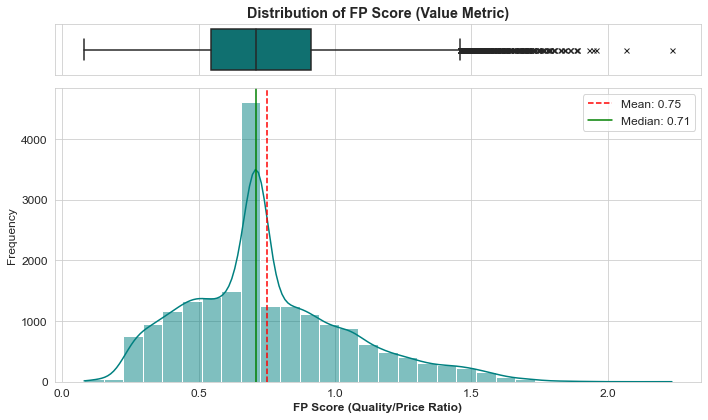

✓ Saved plot: ../../outputs/figures/eda_target_classes.png


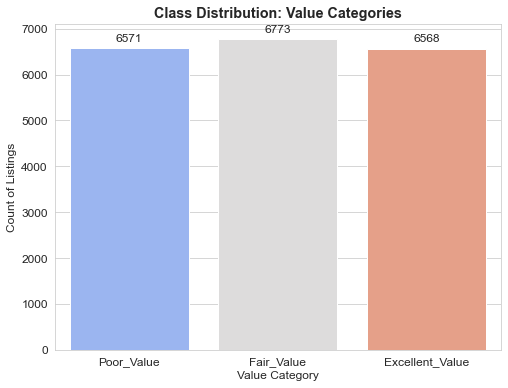


--- Class Proportions ---
Fair_Value         34.014665
Poor_Value         33.000201
Excellent_Value    32.985135
Name: value_category, dtype: float64


In [11]:
# Cell 5: Target Variable Analysis (FP Score & Categories)

# 1. FP Score Distribution (Continuous Target)
plot_distribution(
    data=df_eda,
    column='fp_score',
    title='Distribution of FP Score (Value Metric)',
    xlabel='FP Score (Quality/Price Ratio)',
    save_name='eda_dist_fp_score.png'
)

# 2. Value Category Distribution (Class Balance)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='value_category', data=df_eda, palette='coolwarm', 
                   order=['Poor_Value', 'Fair_Value', 'Excellent_Value'])

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Class Distribution: Value Categories', fontweight='bold')
plt.xlabel('Value Category')
plt.ylabel('Count of Listings')

# Save
save_path = os.path.join(FIGURES_PATH, 'eda_target_classes.png')
plt.savefig(save_path, dpi=300)
print(f"✓ Saved plot: {save_path}")
plt.show()

# Print percentages
print("\n--- Class Proportions ---")
print(df_eda['value_category'].value_counts(normalize=True) * 100)